# Exploring bike share data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description
> This is randomly selected data related to bike share systems for the first six months of 2017 in three large cities: Chicago, New York City, and Washington, DC.

|   **Column**  |                    **Description**                    |
|:-------------:|:-----------------------------------------------------:|
|       X       |                      Index value                      |
|   Start.Time  |                Trip start day and time                |
|    End.Time   |                 Trip end day and time                 |
| Trip.Duration |              Duration of trip in seconds              |
| Start.Station |                   Trip start station                  |
|  End.Station  |                    Trip end station                   |
|   User.Type   |          Rider type (Subscriber or Customer)          |
|     Gender    |    Male or Female (Chicago and New York City only)    |
|   Birth.Year  | User's year of birth (Chicago and New York City only) |

### Questions for Analysis

- What is the most common month (start month) for bike share use by user type?
- What is the most common start station in each city?
- What are the counts of each user type overall and in each city?

### Import necessary libraries

In [1]:
library(tidyverse)
library(lubridate)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



### Read in csv files

In [2]:
ny = read.csv('./data/new_york_city.csv')
wash = read.csv('./data/washington.csv')
chi = read.csv('./data/chicago.csv')

In [3]:
# Set options
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)

<a id='wrangling'></a>
## Data Wrangling

<ul>
    <li><a href="#ny">New York City</a></li>
    <li><a href="#chi">Chicago</a></li>
    <li><a href="#wash">Washington, DC</a></li>
</ul>

<a id='ny'></a>
### Explore the NY dataset

In [4]:
# Find number of rows and columns
dim(ny) 

[1] 54770     9

In [5]:
# Check column names
names(ny)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
[9] "Birth.Year"

In [6]:
# Check top 6 rows of dataset
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [7]:
# Check bottom 6 rows of dataset
tail(ny) 

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
54765,1293888,2017-02-23 06:14:14,2017-02-23 06:23:32,558,E 27 St & 1 Ave,E 47 St & Park Ave,Subscriber,Male,1984
54766,642855,2017-01-28 16:44:18,2017-01-28 16:48:18,240,W 52 St & 9 Ave,9 Ave & W 45 St,Subscriber,Male,1991
54767,2157959,2017-03-29 06:30:35,2017-03-29 06:32:41,125,W 84 St & Columbus Ave,W 87 St & Amsterdam Ave,Subscriber,Male,1984
54768,5679624,2017-06-11 12:52:27,2017-06-11 12:58:35,367,8 Ave & W 33 St,W 45 St & 8 Ave,Subscriber,Male,1954
54769,6762960,2017-06-30 07:48:34,2017-06-30 08:17:16,1722,Cathedral Pkwy & Broadway,Broadway & W 51 St,Subscriber,Male,1974
54770,6078570,2017-06-18 16:20:21,201,NA,,,,,NA


In [8]:
# Check structure of data including datatypes
str(ny)

'data.frame':	54770 obs. of  9 variables:
 $ X            : int  5688089 4096714 2173887 3945638 6208972 1285652 1675753 1692245 2271331 1558339 ...
 $ Start.Time   : Factor w/ 54568 levels "2017-01-01 00:17:01",..: 45448 32799 17316 31589 49688 10220 13390 13509 18111 12449 ...
 $ End.Time     : Factor w/ 54562 levels "201","2017-01-01 00:30:56",..: 45432 32783 17295 31567 49668 10204 13364 13505 18092 12422 ...
 $ Trip.Duration: int  795 692 1325 703 329 998 478 4038 5132 309 ...
 $ Start.Station: Factor w/ 636 levels "","1 Ave & E 16 St",..: 522 406 10 93 5 521 325 309 151 245 ...
 $ End.Station  : Factor w/ 638 levels "","1 Ave & E 16 St",..: 613 8 362 558 269 107 389 110 151 243 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 3 2 3 ...
 $ Gender       : Factor w/ 3 levels "","Female","Male": 3 3 3 2 3 3 3 3 1 3 ...
 $ Birth.Year   : num  1998 1981 1987 1986 1992 ...


`Start.Time` and `End.Time` are both factor types and will need to be converted

`End.Time` has a value of 201 instead of a date and time

`User.Type` has 3 levels. We expect Customer and Subscriber and some of the values are missing.

`Gender` has 3 levels. We expect Male and Female and some of the values are missing.

In [9]:
# Create object to store every row that has at least one missing value
ny_missing <- !complete.cases(ny)

# Show all the rows with missing data
ny[ny_missing,]

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
9,2271331,2017-04-02 08:02:36,2017-04-02 09:28:08,5132,Central Park S & 6 Ave,Central Park S & 6 Ave,Customer,,NA
11,2287178,2017-04-02 14:37:20,2017-04-02 14:56:12,1131,Bank St & Washington St,Little West St & 1 Pl,Customer,,NA
20,5857,2017-01-01 13:32:39,2017-01-01 13:49:57,1038,W 22 St & 8 Ave,W 45 St & 6 Ave,Customer,,NA
24,2497952,2017-04-08 13:39:48,2017-04-08 14:04:24,1476,Dean St & Hoyt St,Plaza St West & Flatbush Ave,Customer,,NA
33,3676202,2017-05-02 21:43:28,2017-05-02 22:29:15,2746,Old Fulton St,Broadway & E 14 St,Customer,,NA
37,1975396,2017-03-22 08:56:43,2017-03-22 09:07:13,630,Broadway & W 29 St,E 17 St & Broadway,Customer,,NA
39,5630375,2017-06-10 14:03:43,2017-06-10 14:05:00,76,Bayard St & Baxter St,Bayard St & Baxter St,Customer,,NA
53,2897347,2017-04-16 15:23:43,2017-04-16 15:44:16,1233,Cleveland Pl & Spring St,S 5 Pl & S 4 St,Customer,,NA
61,3847598,2017-05-06 15:58:00,2017-05-06 16:31:17,1997,Front St & Maiden Ln,Old Fulton St,Customer,,NA
66,6018157,2017-06-17 08:06:57,2017-06-17 08:35:44,1727,Pier 40 - Hudson River Park,Pier 40 - Hudson River Park,Customer,,NA


Most of the missing values appears to be coming from `Gender` and `Birth.Year`.

`X` ID of 6078570 is missing values or has incorrect values in almost all the columns. This record will need to be removed completely.

In [10]:
# Count duplicated rows
sum(duplicated(ny))

[1] 0

<a id='chi'></a>
### Explore the Chicago dataset

In [11]:
# Find number of rows and columns
dim(chi) 

[1] 8630    9

In [12]:
# Check column names
names(chi)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
[9] "Birth.Year"

In [13]:
# Check top 6 rows of dataset
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [14]:
# Check bottom 6 rows of dataset
tail(chi)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
8625,397518,2017-03-24 16:52:16,2017-03-24 16:57:57,341,Southport Ave & Waveland Ave,Southport Ave & Waveland Ave,Subscriber,Male,1990
8626,879494,2017-05-18 05:06:50,2017-05-18 05:22:10,920,Artesian Ave & Hubbard St,Wacker Dr & Washington St,Subscriber,Male,1959
8627,360389,2017-03-19 07:21:29,2017-03-19 07:27:18,349,Wabash Ave & Roosevelt Rd,Wells St & Polk St,Subscriber,Male,1987
8628,858496,2017-05-16 17:03:24,2017-05-16 17:31:12,1668,Ashland Ave & Harrison St,Wells St & Concord Ln,Subscriber,Male,1963
8629,777620,2017-05-10 08:53:03,2017-05-10 08:54:32,89,Western Ave & Leland Ave,Western Ave & Leland Ave,Subscriber,Male,1977
8630,1230561,2017-06-11 14:52:13,2017-06-11 15:42:33,3020,Waba,,,,NA


In [15]:
# Check structure of data including datatypes
str(chi)

'data.frame':	8630 obs. of  9 variables:
 $ X            : int  1423854 955915 9031 304487 45207 1473887 961916 65924 606841 135470 ...
 $ Start.Time   : Factor w/ 8624 levels "2017-01-01 00:40:14",..: 7876 5303 73 1721 267 8173 5347 368 3376 795 ...
 $ End.Time     : Factor w/ 8625 levels "2017-01-01 00:46:32",..: 7876 5303 73 1722 267 8173 5346 368 3376 796 ...
 $ Trip.Duration: int  321 1610 416 350 534 586 281 723 689 493 ...
 $ Start.Station: Factor w/ 472 levels "2112 W Peterson Ave",..: 468 424 291 80 103 119 22 255 374 420 ...
 $ End.Station  : Factor w/ 471 levels "","2112 W Peterson Ave",..: 132 381 469 409 151 70 467 251 200 118 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 2 3 3 ...
 $ Gender       : Factor w/ 3 levels "","Female","Male": 3 2 3 3 3 3 2 1 3 3 ...
 $ Birth.Year   : num  1992 1992 1981 1986 1975 ...


`Start.Time` and `End.Time` are both factor types and will need to be converted

`End.Station` has a missing value and will need to be investigated when cleaning.

`User.Type` has 3 levels. We expect Customer and Subscriber and some of the values are missing.

`Gender` has 3 levels. We expect Male and Female and some of the values are missing.

In [16]:
# Create object to store every row that has at least one missing value
chi_missing <- !complete.cases(chi)

# Show all the rows with missing data
chi[chi_missing,]

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
8,65924,2017-01-21 14:28:38,2017-01-21 14:40:41,723,Larrabee St & Kingsbury St,Larrabee St & Armitage Ave,Customer,,NA
20,475456,2017-04-08 11:37:55,2017-04-08 11:51:55,840,Adler Planetarium,Burnham Harbor,Customer,,NA
32,1539334,2017-06-30 10:56:50,2017-06-30 11:40:20,2610,McCormick Place,Adler Planetarium,Customer,,NA
36,243879,2017-02-22 15:33:56,2017-02-22 15:54:07,1211,Streeter Dr & Grand Ave,Theater on the Lake,Customer,,NA
39,720062,2017-05-03 16:27:08,2017-05-03 16:45:15,1087,Clark St & Elm St,Michigan Ave & Pearson St,Customer,,NA
41,1314009,2017-06-16 19:34:44,2017-06-16 20:16:23,2499,State St & Van Buren St,McClurg Ct & Erie St,Customer,,NA
45,1372709,2017-06-20 16:14:15,2017-06-20 16:42:26,1691,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,Customer,,NA
53,157790,2017-02-11 15:11:34,2017-02-11 16:30:04,4710,McCormick Place,Wabash Ave & Wacker Pl,Customer,,NA
57,1526760,2017-06-29 13:50:47,2017-06-29 14:10:04,1157,Lake Shore Dr & Belmont Ave,Lake Shore Dr & North Blvd,Customer,,NA
62,1539175,2017-06-30 10:44:24,2017-06-30 11:11:03,1599,Millennium Park,Streeter Dr & Grand Ave,Customer,,NA


Most of the missing values appears to be coming from `Gender` and `Birth.Year`.

`X` ID of 1230561 is missing values. This record will need to be removed completely.

In [17]:
# Count duplicated rows
sum(duplicated(chi))

[1] 0

<a id='wash'></a>
### Explore the Washington, DC dataset

In [18]:
# Find number of rows and columns
dim(wash) 

[1] 89051     7

In [19]:
# Check column names
names(wash)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"

In [20]:
# Check top 6 rows of dataset
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [21]:
# Check top 6 rows of dataset
tail(wash)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
89046,1484340,2017-06-10 10:58:09,2017-06-10 11:25:58,1669.700,M St & New Jersey Ave SE,4th St & Madison Dr NW,Customer
89047,555788,2017-03-22 18:46:00,2017-03-22 19:04:00,1082.789,8th & H St NW,21st & I St NW,Subscriber
89048,739004,2017-04-09 04:00:22,2017-04-09 04:09:54,571.879,Eckington Pl & Q St NE,Columbus Circle / Union Station,Subscriber
89049,1214907,2017-05-19 09:00:53,2017-05-19 09:07:38,404.152,1st & M St NE,1st & Rhode Island Ave NW,Subscriber
89050,1419806,2017-06-06 04:27:33,2017-06-06 04:49:59,1345.911,10th & Florida Ave NW,Georgetown Harbor / 30th St NW,Customer
89051,132,,,NA,,,


In [22]:
# Check structure of data including datatypes
str(wash)

'data.frame':	89051 obs. of  7 variables:
 $ X            : int  1621326 482740 1330037 665458 1481135 1148202 1594275 1601832 574182 327058 ...
 $ Start.Time   : Factor w/ 81223 levels "","2017-01-01 00:11:00",..: 74753 19510 59964 26708 67716 50891 73381 73775 23142 13333 ...
 $ End.Time     : Factor w/ 81217 levels "","2017-01-01 00:14:00",..: 74744 19473 59981 26732 67753 50918 73397 73775 23114 13350 ...
 $ Trip.Duration: num  489 403 637 1827 1549 ...
 $ Start.Station: Factor w/ 478 levels "","10th & E St NW",..: 27 478 66 221 278 84 368 82 71 60 ...
 $ End.Station  : Factor w/ 479 levels "","10th & E St NW",..: 47 219 144 312 315 239 162 376 51 308 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 2 3 3 3 3 3 3 ...


`Start.Time` and `End.Time` are both factor types and will need to be converted

`Start.Station` and `End.Station` have missing values and will need to be investigated when cleaning.

`Trip.Duration` is a num instead of int in the `Chicago` and `New York City` datasets.

`End.Station` has a missing value and will need to be investigated when cleaning.

`User.Type` has 3 levels. We expect Customer and Subscriber and some of the values are missing.

In [23]:
# Create object to store every row that has at least one missing value
wash_missing <- !complete.cases(wash)

# Show all the rows with missing data
wash[wash_missing,]

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
89051,132,,,NA,,,


`X` ID of 132 is missing values. This record will need to be removed completely.

In [24]:
# Count duplicated rows
sum(duplicated(wash))

[1] 0

### Data Cleaning

To help answer the analysis questions each dataset will need to be cleaned. The following steps will be taken to clean the data:

- Remove columns that are not needed to answer analysis questions
- Update and transform data in columns for easier understanding and consistency
- Remove records with incorrect or missing values
- Add new columns to assist with answering questions
- Merge each new clean dataset into a single dataset

In [25]:
# Make copies of all the datasets before cleaning
# Creates a copy with a different memory address
# https://rdrr.io/cran/data.table/man/copy.html

ny_clean <- data.table::copy(ny)
chi_clean <- data.table::copy(chi)
wash_clean <- data.table::copy(wash)

In [26]:
# Create function to help format date columns in the datasets

create_date_cols <- function(df) {
    #' Create indvidual date columns for start and end dates
    #'
    #' Given a dataframe with Start.Date and End.Date columns
    #' create start_date and end_date columns
    #' @param dataframe

    # Add start_date column with date from Start.Time
    df$start_date <- as.Date(df$Start.Time)

    # Add end_date column with date from End.Time
    df$end_date <- as.Date(df$End.Time)

    return(df)
}

In [27]:
# Create function to help create month, day, and year cols

create_mdy_cols <- function(df) {
    #' Create month, day, and year columns
    #' 
    #' Given a dataframe with start_date and end_date columns
    #' create month, day, and year columns for both start and end
    #' @param dataframe

    # Create mdy cols for start_date
    # Create start_month column
    df$start_month <- month(df$start_date)

    # Create start_day column
    df$start_day <- wday(df$start_date)

    # Create start_year column
    df$start_year <- year(df$start_date)

    # Create mdy cols for end_date
    # Create start_month column
    df$end_month <- month(df$end_date)

    # Create start_day column
    df$end_day <- wday(df$end_date)

    # Create start_year column
    df$end_year <- year(df$end_date)

    return(df)
}  

In [28]:
# Create function to help format time columns in the datasets

create_time_cols <- function(df) {
    #' Create individual time columns
    #'
    #' Given a dataframe with Start.Time and End.Time columns
    #' create hour, minute, and second columns for both start and end
    #' @param dataframe

    # Create start_hour column which grabs just the Hour from the Start.Time
    df$start_hour <- format(as.POSIXct(df$Start.Time),
                            format = "%H")
    # Create start_minute column which grabs just the Minute from the Start.Time
    df$start_minute <- format(as.POSIXct(df$Start.Time), 
                              format = "%M")
    # Create start_second column which grabs just the Second from the Start.Time
    df$start_second <- format(as.POSIXct(df$Start.Time), 
                              format = "%S")
    # Create end_hour column which grabs just the Hour from the End.Time
    df$end_hour <- format(as.POSIXct(df$End.Time),
                          format = "%H")
    # Create end_minute column which grabs just the Minute from the End.Time
    df$end_minute <- format(as.POSIXct(df$End.Time),
                            format = "%M")
    # Create end_second column which grabs just the Second from the End.Time
    df$end_second <- format(as.POSIXct(df$End.Time),
                            format = "%S")
    return(df)
}

#### Clean New York City Dataset

In [29]:
names(ny_clean)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
[9] "Birth.Year"

In [30]:
# Remove Gender and Birth.Year columns
ny_clean <- ny_clean %>%
              select(X, Start.Time, End.Time, Trip.Duration, Start.Station, End.Station, User.Type)

In [31]:
# Check that columns have been removed
names(ny_clean)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"

In [32]:
# Add column for city name for merging into single dataframe
ny_clean <- ny_clean %>%
              mutate(city = 'NYC') %>%
              select(X, Start.Time, End.Time, Trip.Duration, Start.Station, End.Station, User.Type, city)

In [33]:
# Check that city column has been added
sample_n(ny_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city
2404824,2017-04-05 14:18:51,2017-04-05 14:28:21,569,Lexington Ave & E 24 St,Broadway & W 37 St,Subscriber,NYC
1378680,2017-02-24 20:21:11,2017-02-24 20:39:57,1126,E 19 St & 3 Ave,1 Ave & E 62 St,Subscriber,NYC
5720774,2017-06-12 07:57:44,2017-06-12 08:01:25,221,DeKalb Ave & S Portland Ave,Fulton St & Rockwell Pl,Subscriber,NYC
5344916,2017-06-05 16:11:24,2017-06-05 16:29:00,1055,W 38 St & 8 Ave,E 65 St & 2 Ave,Subscriber,NYC
2284370,2017-04-02 13:54:06,2017-04-02 14:05:42,695,Cadman Plaza E & Tillary St,Hanson Pl & Ashland Pl,Customer,NYC


In [34]:
# Add start_date and end_date columns
ny_clean <- create_date_cols(ny_clean)

In [35]:
# Check that new start_date and end_date columns are created
sample_n(ny_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date
6137361,2017-06-19 23:04:23,2017-06-19 23:29:46,1522,Sullivan St & Washington Sq,E 39 St & 2 Ave,Subscriber,NYC,2017-06-19,2017-06-19
3372,2017-01-01 11:34:03,2017-01-01 11:56:25,1342,12 Ave & W 40 St,W 100 St & Manhattan Ave,Subscriber,NYC,2017-01-01,2017-01-01
5550532,2017-06-09 08:45:51,2017-06-09 09:03:41,1070,E 11 St & 2 Ave,E 47 St & 2 Ave,Subscriber,NYC,2017-06-09,2017-06-09
416343,2017-01-19 18:51:25,2017-01-19 19:07:57,991,Grand Army Plaza & Central Park S,W 37 St & 10 Ave,Subscriber,NYC,2017-01-19,2017-01-19
6053742,2017-06-18 08:53:32,2017-06-18 09:00:36,424,W 13 St & 5 Ave,W 4 St & 7 Ave S,Customer,NYC,2017-06-18,2017-06-18


In [36]:
# Check data types
str(ny_clean)

'data.frame':	54770 obs. of  10 variables:
 $ X            : int  5688089 4096714 2173887 3945638 6208972 1285652 1675753 1692245 2271331 1558339 ...
 $ Start.Time   : Factor w/ 54568 levels "2017-01-01 00:17:01",..: 45448 32799 17316 31589 49688 10220 13390 13509 18111 12449 ...
 $ End.Time     : Factor w/ 54562 levels "201","2017-01-01 00:30:56",..: 45432 32783 17295 31567 49668 10204 13364 13505 18092 12422 ...
 $ Trip.Duration: int  795 692 1325 703 329 998 478 4038 5132 309 ...
 $ Start.Station: Factor w/ 636 levels "","1 Ave & E 16 St",..: 522 406 10 93 5 521 325 309 151 245 ...
 $ End.Station  : Factor w/ 638 levels "","1 Ave & E 16 St",..: 613 8 362 558 269 107 389 110 151 243 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 3 2 3 ...
 $ city         : chr  "NYC" "NYC" "NYC" "NYC" ...
 $ start_date   : Date, format: "2017-06-11" "2017-05-11" ...
 $ end_date     : Date, format: "2017-06-11" "2017-05-11" ...


In [37]:
# Check unique values for end_date
unique(ny_clean$end_date)

[1] "2017-06-11" "2017-05-11" "2017-03-29" "2017-05-08" "2017-06-21"
  [6] "2017-02-22" "2017-03-06" "2017-03-07" "2017-04-02" "2017-03-01"
 [11] "2017-04-13" "2017-04-28" "2017-02-13" "2017-02-28" "2017-01-11"
 [16] "2017-06-23" "2017-05-24" "2017-01-01" "2017-02-18" "2017-04-27"
 [21] "2017-03-09" "2017-04-08" "2017-04-16" "2017-04-21" "2017-04-17"
 [26] "2017-03-25" "2017-04-30" "2017-06-06" "2017-03-23" "2017-05-02"
 [31] "2017-02-25" "2017-06-22" "2017-02-08" "2017-03-22" "2017-01-28"
 [36] "2017-06-10" "2017-06-08" "2017-05-07" "2017-04-10" "2017-06-24"
 [41] "2017-03-20" "2017-05-30" "2017-05-19" "2017-06-28" "2017-06-05"
 [46] "2017-01-26" "2017-06-16" "2017-05-01" "2017-06-07" "2017-05-20"
 [51] "2017-05-27" "2017-05-10" "2017-05-06" "2017-05-21" "2017-04-25"
 [56] "2017-06-29" "2017-06-17" "2017-01-05" "2017-04-15" "2017-01-17"
 [61] "2017-01-20" "2017-06-15" "2017-04-24" "2017-05-15" "2017-05-16"
 [66] "2017-02-24" "2017-04-29" "2017-06-18" "2017-06-14" "2017-04-05"
 [71] "2017-06-13" "2017-03-21" "2017-04-18" "2017-05-14" "2017-04-12"
 [76] "2017-05-17" "2017-03-10" "2017-01-19" "2017-05-23" "2017-04-20"
 [81] "2017-06-20" "2017-02-20" "2017-04-19" "2017-03-13" "2017-05-26"
 [86] "2017-06-02" "2017-03-02" "2017-01-18" "2017-03-08" "2017-04-14"
 [91] "2017-04-09" "2017-02-04" "2017-05-04" "2017-04-23" "2017-02-23"
 [96] "2017-05-03" "2017-06-25" "2017-02-02" "2017-04-06" "2017-01-04"
[101] "2017-03-28" "2017-01-12" "2017-03-17" "2017-04-03" "2017-02-11"
[106] "2017-06-04" "2017-01-30" "2017-06-09" "2017-04-07" "2017-01-29"
[111] "2017-05-05" "2017-03-05" "2017-04-26" "2017-03-27" "2017-06-01"
[116] "2017-01-13" "2017-02-19" "2017-05-22" "2017-06-12" "2017-02-21"
[121] "2017-01-22" "2017-02-14" "2017-06-30" "2017-03-24" "2017-06-27"
[126] "2017-03-12" "2017-05-18" "2017-02-03" "2017-04-11" "2017-01-23"
[131] "2017-01-10" "2017-01-16" "2017-06-03" "2017-05-31" "2017-03-03"
[136] "2017-03-30" "2017-06-19" "2017-06-26" "2017-01-24" "2017-01-25"
[141] "2017-02-27" "2017-05-12" "2017-05-09" "2017-03-11" "2017-04-01"
[146] "2017-02-26" "2017-05-25" "2017-03-19" "2017-04-22" "2017-01-06"
[151] "2017-02-06" "2017-02-07" "2017-01-07" "2017-01-03" "2017-02-16"
[156] "2017-03-26" "2017-02-01" "2017-03-04" "2017-04-04" "2017-01-09"
[161] "2017-01-21" "2017-02-17" "2017-01-27" "2017-05-28" "2017-01-31"
[166] "2017-01-02" "2017-07-01" "2017-01-15" "2017-02-15" "2017-05-29"
[171] "2017-01-14" "2017-02-05" "2017-03-31" "2017-02-10" "2017-01-08"
[176] "2017-02-12" "2017-03-18" "2017-05-13" NA

In [38]:
# Keep only records that have a value in the end date field
ny_clean <- ny_clean %>%
              select(everything()) %>%
              filter(complete.cases(ny_clean$end_date))

In [39]:
# Check that no values are empty
unique(ny_clean$end_date)

[1] "2017-06-11" "2017-05-11" "2017-03-29" "2017-05-08" "2017-06-21"
  [6] "2017-02-22" "2017-03-06" "2017-03-07" "2017-04-02" "2017-03-01"
 [11] "2017-04-13" "2017-04-28" "2017-02-13" "2017-02-28" "2017-01-11"
 [16] "2017-06-23" "2017-05-24" "2017-01-01" "2017-02-18" "2017-04-27"
 [21] "2017-03-09" "2017-04-08" "2017-04-16" "2017-04-21" "2017-04-17"
 [26] "2017-03-25" "2017-04-30" "2017-06-06" "2017-03-23" "2017-05-02"
 [31] "2017-02-25" "2017-06-22" "2017-02-08" "2017-03-22" "2017-01-28"
 [36] "2017-06-10" "2017-06-08" "2017-05-07" "2017-04-10" "2017-06-24"
 [41] "2017-03-20" "2017-05-30" "2017-05-19" "2017-06-28" "2017-06-05"
 [46] "2017-01-26" "2017-06-16" "2017-05-01" "2017-06-07" "2017-05-20"
 [51] "2017-05-27" "2017-05-10" "2017-05-06" "2017-05-21" "2017-04-25"
 [56] "2017-06-29" "2017-06-17" "2017-01-05" "2017-04-15" "2017-01-17"
 [61] "2017-01-20" "2017-06-15" "2017-04-24" "2017-05-15" "2017-05-16"
 [66] "2017-02-24" "2017-04-29" "2017-06-18" "2017-06-14" "2017-04-05"
 [71] "2017-06-13" "2017-03-21" "2017-04-18" "2017-05-14" "2017-04-12"
 [76] "2017-05-17" "2017-03-10" "2017-01-19" "2017-05-23" "2017-04-20"
 [81] "2017-06-20" "2017-02-20" "2017-04-19" "2017-03-13" "2017-05-26"
 [86] "2017-06-02" "2017-03-02" "2017-01-18" "2017-03-08" "2017-04-14"
 [91] "2017-04-09" "2017-02-04" "2017-05-04" "2017-04-23" "2017-02-23"
 [96] "2017-05-03" "2017-06-25" "2017-02-02" "2017-04-06" "2017-01-04"
[101] "2017-03-28" "2017-01-12" "2017-03-17" "2017-04-03" "2017-02-11"
[106] "2017-06-04" "2017-01-30" "2017-06-09" "2017-04-07" "2017-01-29"
[111] "2017-05-05" "2017-03-05" "2017-04-26" "2017-03-27" "2017-06-01"
[116] "2017-01-13" "2017-02-19" "2017-05-22" "2017-06-12" "2017-02-21"
[121] "2017-01-22" "2017-02-14" "2017-06-30" "2017-03-24" "2017-06-27"
[126] "2017-03-12" "2017-05-18" "2017-02-03" "2017-04-11" "2017-01-23"
[131] "2017-01-10" "2017-01-16" "2017-06-03" "2017-05-31" "2017-03-03"
[136] "2017-03-30" "2017-06-19" "2017-06-26" "2017-01-24" "2017-01-25"
[141] "2017-02-27" "2017-05-12" "2017-05-09" "2017-03-11" "2017-04-01"
[146] "2017-02-26" "2017-05-25" "2017-03-19" "2017-04-22" "2017-01-06"
[151] "2017-02-06" "2017-02-07" "2017-01-07" "2017-01-03" "2017-02-16"
[156] "2017-03-26" "2017-02-01" "2017-03-04" "2017-04-04" "2017-01-09"
[161] "2017-01-21" "2017-02-17" "2017-01-27" "2017-05-28" "2017-01-31"
[166] "2017-01-02" "2017-07-01" "2017-01-15" "2017-02-15" "2017-05-29"
[171] "2017-01-14" "2017-02-05" "2017-03-31" "2017-02-10" "2017-01-08"
[176] "2017-02-12" "2017-03-18" "2017-05-13"

In [40]:
# Make sure there are no rows with missing values
ny_missing <- !complete.cases(ny_clean)
ny_clean[ny_missing,]

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date


In [41]:
# Create month, day, and year columns for start and end dates
ny_clean <- create_mdy_cols(ny_clean)

In [42]:
# Check that month, day, and year columns were created
sample_n(ny_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date,start_month,start_day,start_year,end_month,end_day,end_year
6336868,2017-06-23 01:24:49,2017-06-23 01:54:58,1809,Union Ave & N 12 St,Concord St & Bridge St,Customer,NYC,2017-06-23,2017-06-23,6,6,2017,6,6,2017
2010334,2017-03-23 15:29:41,2017-03-23 15:44:54,912,W 104 St & Amsterdam Ave,Amsterdam Ave & W 73 St,Subscriber,NYC,2017-03-23,2017-03-23,3,5,2017,3,5,2017
177559,2017-01-11 07:19:34,2017-01-11 07:28:18,524,W 26 St & 8 Ave,Bank St & Hudson St,Subscriber,NYC,2017-01-11,2017-01-11,1,4,2017,1,4,2017
4129876,2017-05-12 08:00:01,2017-05-12 08:03:06,184,Broadway & W 56 St,Broadway & W 49 St,Subscriber,NYC,2017-05-12,2017-05-12,5,6,2017,5,6,2017
2813156,2017-04-14 17:20:42,2017-04-14 17:32:41,719,Cumberland St & Lafayette Ave,Monroe St & Classon Ave,Customer,NYC,2017-04-14,2017-04-14,4,6,2017,4,6,2017


In [43]:
# Create hour, minute, and second columns for start and end times
ny_clean <- create_time_cols(ny_clean)

In [44]:
# Check that time columns were created
sample_n(ny_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date,start_month,start_day,start_year,end_month,end_day,end_year,start_hour,start_minute,start_second,end_hour,end_minute,end_second
6412134,2017-06-24 14:26:50,2017-06-24 14:44:54,1084,South End Ave & Liberty St,Bus Slip & State St,Customer,NYC,2017-06-24,2017-06-24,6,7,2017,6,7,2017,14,26,50,14,44,54
3161273,2017-04-22 10:03:26,2017-04-22 10:07:12,226,E 10 St & Avenue A,E 3 St & 1 Ave,Subscriber,NYC,2017-04-22,2017-04-22,4,7,2017,4,7,2017,10,03,26,10,07,12
6075092,2017-06-18 15:31:49,2017-06-18 16:04:30,1961,Centre St & Chambers St,Concord St & Bridge St,Customer,NYC,2017-06-18,2017-06-18,6,1,2017,6,1,2017,15,31,49,16,04,30
2912073,2017-04-16 19:20:34,2017-04-16 20:03:29,2575,Central Park West & W 72 St,W 4 St & 7 Ave S,Subscriber,NYC,2017-04-16,2017-04-16,4,1,2017,4,1,2017,19,20,34,20,03,29
3566032,2017-05-01 07:54:06,2017-05-01 08:17:15,1389,E 88 St & Park Ave,W 25 St & 6 Ave,Subscriber,NYC,2017-05-01,2017-05-01,5,2,2017,5,2,2017,07,54,06,08,17,15


In [45]:
# Rename columns
ny_clean <- ny_clean %>%
              rename(
                  trip_duration = Trip.Duration,
                  start_station = Start.Station,
                  end_station = End.Station,
                  user_type = User.Type
              )

In [46]:
# Check that columns are renamed
sample_n(ny_clean, 5)

X,Start.Time,End.Time,trip_duration,start_station,end_station,user_type,city,start_date,end_date,start_month,start_day,start_year,end_month,end_day,end_year,start_hour,start_minute,start_second,end_hour,end_minute,end_second
4299823,2017-05-16 11:07:05,2017-05-16 11:23:06,960,Broadway & W 56 St,8 Ave & W 33 St,Subscriber,NYC,2017-05-16,2017-05-16,5,3,2017,5,3,2017,11,07,05,11,23,06
1544093,2017-03-01 17:30:40,2017-03-01 17:42:52,731,5 Ave & E 63 St,5 Ave & E 88 St,Subscriber,NYC,2017-03-01,2017-03-01,3,4,2017,3,4,2017,17,30,40,17,42,52
4748982,2017-05-24 13:55:51,2017-05-24 14:09:14,803,E 14 St & Avenue B,E 6 St & Avenue D,Customer,NYC,2017-05-24,2017-05-24,5,4,2017,5,4,2017,13,55,51,14,09,14
6799729,2017-06-30 17:34:56,2017-06-30 17:44:32,575,Congress St & Clinton St,Douglass St & 3 Ave,Subscriber,NYC,2017-06-30,2017-06-30,6,6,2017,6,6,2017,17,34,56,17,44,32
4972721,2017-05-29 21:02:26,2017-05-29 21:21:55,1168,Central Park S & 6 Ave,Broadway & W 41 St,Customer,NYC,2017-05-29,2017-05-29,5,2,2017,5,2,2017,21,02,26,21,21,55


In [47]:
# Remove columns not needed and reorder remaining columns
ny_clean <- ny_clean %>%
            select(
                city,
                user_type,
                trip_duration,
                start_station,
                start_month,
                start_day,
                start_year,
                start_hour,
                start_minute,
                start_second,
                end_station,
                end_month,
                end_day,
                end_year,
                end_hour,
                end_minute,
                end_second
             )

In [48]:
# Confirm columns have been removed and the rest are in the correct order
sample_n(ny_clean, 5)

city,user_type,trip_duration,start_station,start_month,start_day,start_year,start_hour,start_minute,start_second,end_station,end_month,end_day,end_year,end_hour,end_minute,end_second
NYC,Subscriber,159,11 Ave & W 59 St,3,4,2017,09,57,59,W 64 St & West End Ave,3,4,2017,10,00,39
NYC,Subscriber,176,W 41 St & 8 Ave,1,5,2017,16,36,56,W 42 St & Dyer Ave,1,5,2017,16,39,52
NYC,Subscriber,1306,Little West St & 1 Pl,6,6,2017,17,27,31,W 34 St & 11 Ave,6,6,2017,17,49,17
NYC,Subscriber,854,Broadway & W 41 St,5,3,2017,08,30,46,E 41 St & Madison Ave,5,3,2017,08,45,01
NYC,Subscriber,200,E 14 St & Avenue B,2,2,2017,09,07,20,E 10 St & Avenue A,2,2,2017,09,10,40


#### Clean Chicago Dataset

In [49]:
names(chi_clean)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
[9] "Birth.Year"

In [50]:
# Remove Gender and Birth.Year columns
chi_clean <- chi_clean %>%
              select(X, Start.Time, End.Time, Trip.Duration, Start.Station, End.Station, User.Type)

In [51]:
# Check that columns have been removed
names(chi_clean)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"

In [52]:
# Add column for city name for merging into single dataframe
chi_clean <- chi_clean %>%
              mutate(city = 'CHI') %>%
              select(X, Start.Time, End.Time, Trip.Duration, Start.Station, End.Station, User.Type, city)

In [53]:
# Check that city column has been added
sample_n(chi_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city
1339845,2017-06-18 15:12:15,2017-06-18 15:22:39,624,Chicago Ave & Washington St,Eastlake Ter & Rogers Ave,Subscriber,CHI
205006,2017-02-18 15:52:37,2017-02-18 16:13:31,1254,Leavitt St & North Ave,Sedgwick St & North Ave,Customer,CHI
1150659,2017-06-07 07:20:22,2017-06-07 07:28:52,510,Peoria St & Jackson Blvd,Dearborn St & Monroe St,Subscriber,CHI
1435284,2017-06-24 09:17:08,2017-06-24 09:31:33,865,Sedgwick St & North Ave,LaSalle St & Adams St,Subscriber,CHI
1488764,2017-06-27 07:10:10,2017-06-27 07:31:34,1284,Sheffield Ave & Willow St,Millennium Park,Subscriber,CHI


In [54]:
# Add start_date and end_date columns
chi_clean <- create_date_cols(chi_clean)

In [55]:
# Check that new start_date and end_date columns are created
sample_n(chi_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date
473031,2017-04-07 21:24:56,2017-04-07 21:27:37,161,Ashland Ave & Chicago Ave,Eckhart Park,Subscriber,CHI,2017-04-07,2017-04-07
1426854,2017-06-23 16:59:46,2017-06-23 17:24:46,1500,Clinton St & Madison St,Damen Ave & Augusta Blvd,Subscriber,CHI,2017-06-23,2017-06-23
1137732,2017-06-06 11:08:22,2017-06-06 11:52:59,2677,Streeter Dr & Grand Ave,Lake Shore Dr & Monroe St,Customer,CHI,2017-06-06,2017-06-06
1179424,2017-06-08 17:54:49,2017-06-08 18:05:43,654,Clinton St & Jackson Blvd,Clinton St & Washington Blvd,Customer,CHI,2017-06-08,2017-06-08
1083790,2017-06-03 10:30:37,2017-06-03 10:41:10,633,Clark St & Grace St,Clark St & Wellington Ave,Subscriber,CHI,2017-06-03,2017-06-03


In [56]:
# Check data types
str(chi_clean)

'data.frame':	8630 obs. of  10 variables:
 $ X            : int  1423854 955915 9031 304487 45207 1473887 961916 65924 606841 135470 ...
 $ Start.Time   : Factor w/ 8624 levels "2017-01-01 00:40:14",..: 7876 5303 73 1721 267 8173 5347 368 3376 795 ...
 $ End.Time     : Factor w/ 8625 levels "2017-01-01 00:46:32",..: 7876 5303 73 1722 267 8173 5346 368 3376 796 ...
 $ Trip.Duration: int  321 1610 416 350 534 586 281 723 689 493 ...
 $ Start.Station: Factor w/ 472 levels "2112 W Peterson Ave",..: 468 424 291 80 103 119 22 255 374 420 ...
 $ End.Station  : Factor w/ 471 levels "","2112 W Peterson Ave",..: 132 381 469 409 151 70 467 251 200 118 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 2 3 3 ...
 $ city         : chr  "CHI" "CHI" "CHI" "CHI" ...
 $ start_date   : Date, format: "2017-06-23" "2017-05-25" ...
 $ end_date     : Date, format: "2017-06-23" "2017-05-25" ...


In [57]:
# Check for rows with missing values
chi_missing <- !complete.cases(chi_clean)
chi_clean[chi_missing,]

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date


In [58]:
# Create month, day, and year columns for start and end dates
chi_clean <- create_mdy_cols(chi_clean)

In [59]:
# Check that month, day, and year columns were created
sample_n(chi_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date,start_month,start_day,start_year,end_month,end_day,end_year
1282775,2017-06-14 21:53:24,2017-06-14 22:14:14,1250,Dearborn St & Monroe St,Morgan St & Lake St,Customer,CHI,2017-06-14,2017-06-14,6,4,2017,6,4,2017
499050,2017-04-10 02:29:43,2017-04-10 02:42:00,737,Noble St & Milwaukee Ave,California Ave & Milwaukee Ave,Subscriber,CHI,2017-04-10,2017-04-10,4,2,2017,4,2,2017
1005669,2017-05-29 14:02:39,2017-05-29 14:44:55,2536,Shore Dr & 55th St,Field Blvd & South Water St,Customer,CHI,2017-05-29,2017-05-29,5,2,2017,5,2,2017
1428821,2017-06-23 17:55:41,2017-06-23 18:06:48,667,Mies van der Rohe Way & Chestnut St,Streeter Dr & Grand Ave,Customer,CHI,2017-06-23,2017-06-23,6,6,2017,6,6,2017
552153,2017-04-15 16:46:26,2017-04-15 17:06:40,1214,Streeter Dr & Grand Ave,Lake Shore Dr & North Blvd,Customer,CHI,2017-04-15,2017-04-15,4,7,2017,4,7,2017


In [60]:
# Create hour, minute, and second columns for start and end times
chi_clean <- create_time_cols(chi_clean)

In [61]:
# Check that time columns were created
sample_n(chi_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date,start_month,start_day,start_year,end_month,end_day,end_year,start_hour,start_minute,start_second,end_hour,end_minute,end_second
992206,2017-05-28 15:35:31,2017-05-28 15:41:38,367,Campbell Ave & Montrose Ave,Oakley Ave & Irving Park Rd,Subscriber,CHI,2017-05-28,2017-05-28,5,1,2017,5,1,2017,15,35,31,15,41,38
1318422,2017-06-17 09:59:14,2017-06-17 10:46:01,2807,Michigan Ave & 8th St,Michigan Ave & Oak St,Customer,CHI,2017-06-17,2017-06-17,6,7,2017,6,7,2017,09,59,14,10,46,01
1266948,2017-06-13 17:40:14,2017-06-13 17:43:21,187,Wabash Ave & Roosevelt Rd,Wabash Ave & 16th St,Subscriber,CHI,2017-06-13,2017-06-13,6,3,2017,6,3,2017,17,40,14,17,43,21
71021,2017-01-22 13:13:29,2017-01-22 13:19:03,334,Clinton St & Roosevelt Rd,Desplaines St & Jackson Blvd,Subscriber,CHI,2017-01-22,2017-01-22,1,1,2017,1,1,2017,13,13,29,13,19,03
1170155,2017-06-08 09:14:22,2017-06-08 09:31:26,1024,Southport Ave & Clark St,Sheffield Ave & Fullerton Ave,Subscriber,CHI,2017-06-08,2017-06-08,6,5,2017,6,5,2017,09,14,22,09,31,26


In [62]:
# Rename columns
chi_clean <- chi_clean %>%
              rename(
                  trip_duration = Trip.Duration,
                  start_station = Start.Station,
                  end_station = End.Station,
                  user_type = User.Type
              )

In [63]:
# Check that columns are renamed
sample_n(chi_clean, 5)

X,Start.Time,End.Time,trip_duration,start_station,end_station,user_type,city,start_date,end_date,start_month,start_day,start_year,end_month,end_day,end_year,start_hour,start_minute,start_second,end_hour,end_minute,end_second
1382957,2017-06-21 07:56:16,2017-06-21 08:07:50,694,Clinton St & Lake St,Canal St & Taylor St,Subscriber,CHI,2017-06-21,2017-06-21,6,4,2017,6,4,2017,07,56,16,08,07,50
919854,2017-05-22 11:44:34,2017-05-22 12:08:13,1419,Montrose Harbor,Lake Shore Dr & Belmont Ave,Customer,CHI,2017-05-22,2017-05-22,5,2,2017,5,2,2017,11,44,34,12,08,13
1465495,2017-06-25 17:05:50,2017-06-25 17:19:47,837,Buckingham Fountain,Millennium Park,Customer,CHI,2017-06-25,2017-06-25,6,1,2017,6,1,2017,17,05,50,17,19,47
676591,2017-04-26 17:07:09,2017-04-26 17:09:39,150,Halsted St & Archer Ave,Emerald Ave & 28th St,Subscriber,CHI,2017-04-26,2017-04-26,4,4,2017,4,4,2017,17,07,09,17,09,39
1217538,2017-06-10 18:28:05,2017-06-10 19:42:19,4454,Millennium Park,Museum of Science and Industry,Customer,CHI,2017-06-10,2017-06-10,6,7,2017,6,7,2017,18,28,05,19,42,19


In [64]:
# Remove columns not needed and reorder remaining columns
chi_clean <- chi_clean %>%
            select(
                city,
                user_type,
                trip_duration,
                start_station,
                start_month,
                start_day,
                start_year,
                start_hour,
                start_minute,
                start_second,
                end_station,
                end_month,
                end_day,
                end_year,
                end_hour,
                end_minute,
                end_second
             )

In [65]:
# Confirm columns have been removed and the rest are in the correct order
sample_n(chi_clean, 5)

city,user_type,trip_duration,start_station,start_month,start_day,start_year,start_hour,start_minute,start_second,end_station,end_month,end_day,end_year,end_hour,end_minute,end_second
CHI,Subscriber,574,Larrabee St & Oak St,4,3,2017,15,28,09,Halsted St & Willow St,4,3,2017,15,37,43
CHI,Subscriber,914,Halsted St & Blackhawk St (*),6,2,2017,11,24,36,Dearborn St & Erie St,6,2,2017,11,39,50
CHI,Subscriber,266,Clinton St & Madison St,3,7,2017,22,26,52,Canal St & Adams St,3,7,2017,22,31,18
CHI,Subscriber,222,Wells St & 19th St,5,5,2017,20,45,13,Wabash Ave & Cermak Rd,5,5,2017,20,48,55
CHI,Subscriber,469,LaSalle St & Illinois St,6,2,2017,16,56,19,Clinton St & Madison St,6,2,2017,17,04,08


#### Clean Washington Dataset

In [66]:
names(wash_clean)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"

In [67]:
# Add column for city name for merging into single dataframe
wash_clean <- wash_clean %>%
              mutate(city = 'WASH') %>%
              select(X, Start.Time, End.Time, Trip.Duration, Start.Station, End.Station, User.Type, city)

In [68]:
# Check that city column has been added
sample_n(wash_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city
103186,2017-01-20 18:25:00,2017-01-20 18:35:00,577.773,15th & L St NW,California St & Florida Ave NW,Subscriber,WASH
1328154,2017-05-29 11:30:47,2017-05-29 11:46:07,920.736,5th & K St NW,4th & C St SW,Customer,WASH
1640621,2017-06-23 03:27:13,2017-06-23 03:32:36,323.181,15th & Crystal Dr,26th & S Clark St,Subscriber,WASH
1517460,2017-06-13 07:06:04,2017-06-13 07:19:22,797.843,5th St & Massachusetts Ave NW,22nd & I St NW / Foggy Bottom,Subscriber,WASH
9685,2017-01-04 06:36:00,2017-01-04 06:45:00,532.543,Columbus Circle / Union Station,3rd St & Pennsylvania Ave SE,Subscriber,WASH


In [69]:
# Add start_date and end_date columns
wash_clean <- create_date_cols(wash_clean)

In [70]:
# Check that new start_date and end_date columns are created
sample_n(wash_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date
1289326,2017-05-26 07:30:55,2017-05-26 07:37:49,414.315,20th St & Florida Ave NW,12th & U St NW,Subscriber,WASH,2017-05-26,2017-05-26
1168746,2017-05-16 04:36:23,2017-05-16 04:58:39,1336.126,Washington & Independence Ave SW/HHS,8th & F St NE,Customer,WASH,2017-05-16,2017-05-16
423331,2017-03-03 17:43:00,2017-03-03 17:50:00,423.524,Virginia Square Metro / N Monroe St & 9th St N,Pershing & N George Mason Dr,Subscriber,WASH,2017-03-03,2017-03-03
1721669,2017-06-28 10:10:20,2017-06-28 10:14:08,227.513,17th & G St NW,19th & E Street NW,Subscriber,WASH,2017-06-28,2017-06-28
361931,2017-02-24 12:30:00,2017-02-24 12:37:00,449.967,M St & New Jersey Ave SE,4th & M St SW,Subscriber,WASH,2017-02-24,2017-02-24


In [71]:
# Check data types
str(wash_clean)

'data.frame':	89051 obs. of  10 variables:
 $ X            : int  1621326 482740 1330037 665458 1481135 1148202 1594275 1601832 574182 327058 ...
 $ Start.Time   : Factor w/ 81223 levels "","2017-01-01 00:11:00",..: 74753 19510 59964 26708 67716 50891 73381 73775 23142 13333 ...
 $ End.Time     : Factor w/ 81217 levels "","2017-01-01 00:14:00",..: 74744 19473 59981 26732 67753 50918 73397 73775 23114 13350 ...
 $ Trip.Duration: num  489 403 637 1827 1549 ...
 $ Start.Station: Factor w/ 478 levels "","10th & E St NW",..: 27 478 66 221 278 84 368 82 71 60 ...
 $ End.Station  : Factor w/ 479 levels "","10th & E St NW",..: 47 219 144 312 315 239 162 376 51 308 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 2 3 3 3 3 3 3 ...
 $ city         : chr  "WASH" "WASH" "WASH" "WASH" ...
 $ start_date   : Date, format: "2017-06-21" "2017-03-11" ...
 $ end_date     : Date, format: "2017-06-21" "2017-03-11" ...


In [72]:
# Check for rows with missing values
wash_missing <- !complete.cases(wash_clean)
wash_clean[wash_missing,]

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date
89051,132,,,NA,,,,WASH,NA,NA


In [73]:
# Keep only records that have a value in the end date field (Removes row with missing values)
wash_clean <- wash_clean %>%
              select(everything()) %>%
              filter(complete.cases(wash_clean$end_date))

In [74]:
# Make sure there are no rows with missing values
wash_missing <- !complete.cases(wash_clean)
wash_clean[wash_missing,]

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date


In [75]:
# Create month, day, and year columns for start and end dates
wash_clean <- create_mdy_cols(wash_clean)

In [76]:
# Check that month, day, and year columns were created
sample_n(wash_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date,start_month,start_day,start_year,end_month,end_day,end_year
615405,2017-03-28 17:27:00,2017-03-28 17:48:00,1283.960,21st & M St NW,1st & O St NW,Subscriber,WASH,2017-03-28,2017-03-28,3,3,2017,3,3,2017
1601276,2017-06-20 05:37:40,2017-06-20 05:59:03,1283.001,Lincoln Memorial,11th & M St NW,Customer,WASH,2017-06-20,2017-06-20,6,3,2017,6,3,2017
289040,2017-02-17 10:24:00,2017-02-17 10:28:00,254.321,20th & O St NW / Dupont South,20th St & Florida Ave NW,Subscriber,WASH,2017-02-17,2017-02-17,2,6,2017,2,6,2017
647970,2017-04-01 02:25:48,2017-04-01 02:41:02,914.312,M St & Pennsylvania Ave NW,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,Customer,WASH,2017-04-01,2017-04-01,4,7,2017,4,7,2017
25274,2017-01-06 12:37:00,2017-01-06 12:41:00,207.787,21st & I St NW,23rd & E St NW,Subscriber,WASH,2017-01-06,2017-01-06,1,6,2017,1,6,2017


In [77]:
# Create hour, minute, and second columns for start and end times
wash_clean <- create_time_cols(wash_clean)

In [78]:
# Check that time columns were created
sample_n(wash_clean, 5)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,city,start_date,end_date,start_month,start_day,start_year,end_month,end_day,end_year,start_hour,start_minute,start_second,end_hour,end_minute,end_second
1027138,2017-05-02 05:21:46,2017-05-02 05:50:24,1717.223,4th & M St SW,18th & R St NW,Subscriber,WASH,2017-05-02,2017-05-02,5,3,2017,5,3,2017,05,21,46,05,50,24
1689722,2017-06-26 08:33:48,2017-06-26 08:40:30,401.526,Independence Ave & L'Enfant Plaza SW/DOE,4th & M St SW,Subscriber,WASH,2017-06-26,2017-06-26,6,2,2017,6,2,2017,08,33,48,08,40,30
1307492,2017-05-28 01:39:52,2017-05-28 02:02:16,1344.707,Jefferson Memorial,New York Ave & 15th St NW,Customer,WASH,2017-05-28,2017-05-28,5,1,2017,5,1,2017,01,39,52,02,02,16
935537,2017-04-24 10:01:12,2017-04-24 10:06:26,314.521,25th St & Pennsylvania Ave NW,18th & M St NW,Subscriber,WASH,2017-04-24,2017-04-24,4,2,2017,4,2,2017,10,01,12,10,06,26
548070,2017-03-21 20:29:00,2017-03-21 20:51:00,1322.464,Madison & Fairfax St,Duke St & John Carlyle St,Subscriber,WASH,2017-03-21,2017-03-21,3,3,2017,3,3,2017,20,29,00,20,51,00


In [79]:
# Rename columns
wash_clean <- wash_clean %>%
              rename(
                  trip_duration = Trip.Duration,
                  start_station = Start.Station,
                  end_station = End.Station,
                  user_type = User.Type
              )

In [80]:
# Check that columns are renamed
sample_n(wash_clean, 5)

X,Start.Time,End.Time,trip_duration,start_station,end_station,user_type,city,start_date,end_date,start_month,start_day,start_year,end_month,end_day,end_year,start_hour,start_minute,start_second,end_hour,end_minute,end_second
796720,2017-04-13 05:17:40,2017-04-13 05:29:39,718.706,Wilson Blvd & N Uhle St,C & O Canal & Wisconsin Ave NW,Subscriber,WASH,2017-04-13,2017-04-13,4,5,2017,4,5,2017,05,17,40,05,29,39
547583,2017-03-21 19:38:00,2017-03-21 19:42:00,238.781,27th & Crystal Dr,Crystal City Metro / 18th & Bell St,Subscriber,WASH,2017-03-21,2017-03-21,3,3,2017,3,3,2017,19,38,00,19,42,00
712891,2017-04-06 08:39:35,2017-04-06 08:43:39,244.040,Thomas Circle,10th & K St NW,Subscriber,WASH,2017-04-06,2017-04-06,4,5,2017,4,5,2017,08,39,35,08,43,39
225677,2017-02-07 23:25:00,2017-02-07 23:45:00,1198.465,New York Ave & Hecht Ave NE,10th & Florida Ave NW,Subscriber,WASH,2017-02-07,2017-02-07,2,3,2017,2,3,2017,23,25,00,23,45,00
882996,2017-04-19 06:31:14,2017-04-19 06:44:06,772.190,14th & Girard St NW,14th & Girard St NW,Subscriber,WASH,2017-04-19,2017-04-19,4,4,2017,4,4,2017,06,31,14,06,44,06


In [81]:
# Convert trip_duration to int
wash_clean$trip_duration <- as.integer(wash_clean$trip_duration)

In [82]:
# Check data types
str(wash_clean)

'data.frame':	89050 obs. of  22 variables:
 $ X            : int  1621326 482740 1330037 665458 1481135 1148202 1594275 1601832 574182 327058 ...
 $ Start.Time   : Factor w/ 81223 levels "","2017-01-01 00:11:00",..: 74753 19510 59964 26708 67716 50891 73381 73775 23142 13333 ...
 $ End.Time     : Factor w/ 81217 levels "","2017-01-01 00:14:00",..: 74744 19473 59981 26732 67753 50918 73397 73775 23114 13350 ...
 $ trip_duration: int  489 402 637 1827 1549 398 1105 636 328 1188 ...
 $ start_station: Factor w/ 478 levels "","10th & E St NW",..: 27 478 66 221 278 84 368 82 71 60 ...
 $ end_station  : Factor w/ 479 levels "","10th & E St NW",..: 47 219 144 312 315 239 162 376 51 308 ...
 $ user_type    : Factor w/ 3 levels "","Customer",..: 3 3 3 2 3 3 3 3 3 3 ...
 $ city         : chr  "WASH" "WASH" "WASH" "WASH" ...
 $ start_date   : Date, format: "2017-06-21" "2017-03-11" ...
 $ end_date     : Date, format: "2017-06-21" "2017-03-11" ...
 $ start_month  : num  6 3 5 4 6 5 6 6 3 2 ...
 $ s

In [83]:
# Remove columns not needed and reorder remaining columns
wash_clean <- wash_clean %>%
            select(
                city,
                user_type,
                trip_duration,
                start_station,
                start_month,
                start_day,
                start_year,
                start_hour,
                start_minute,
                start_second,
                end_station,
                end_month,
                end_day,
                end_year,
                end_hour,
                end_minute,
                end_second
             )

In [84]:
# Confirm columns have been removed and the rest are in the correct order
sample_n(wash_clean, 5)

city,user_type,trip_duration,start_station,start_month,start_day,start_year,start_hour,start_minute,start_second,end_station,end_month,end_day,end_year,end_hour,end_minute,end_second
WASH,Subscriber,487,Market Square / King St & Royal St,4,4,2017,05,06,06,Braddock Rd Metro,4,4,2017,05,14,14
WASH,Subscriber,206,Takoma Metro,3,2,2017,17,52,00,Philadelphia & Maple Ave,3,2,2017,17,55,00
WASH,Customer,2196,Massachusetts Ave & Dupont Circle NW,4,1,2017,11,59,00,22nd St & Constitution Ave NW,4,1,2017,12,35,36
WASH,Subscriber,899,8th & O St NW,4,1,2017,01,50,53,3rd & H St NE,4,1,2017,02,05,52
WASH,Customer,412,Thomas Circle,2,5,2017,10,21,00,18th & M St NW,2,5,2017,10,28,00


#### Merge datasets

In [85]:
# Merge all three clean datasets
bikeshare <- rbind(ny_clean, chi_clean, wash_clean)

In [86]:
# Write data to a CSV file
write.csv(bikeshare, './data/bikeshare.csv')

# Read data from CSV file
bikeshare = read.csv('./data/bikeshare.csv')

In [87]:
# Check new dataframe
head(bikeshare, 5)

X,city,user_type,trip_duration,start_station,start_month,start_day,start_year,start_hour,start_minute,start_second,end_station,end_month,end_day,end_year,end_hour,end_minute,end_second
1,NYC,Subscriber,795,Suffolk St & Stanton St,6,1,2017,14,55,5,W Broadway & Spring St,6,1,2017,15,8,21
2,NYC,Subscriber,692,Lexington Ave & E 63 St,5,5,2017,15,30,11,1 Ave & E 78 St,5,5,2017,15,41,43
3,NYC,Subscriber,1325,1 Pl & Clinton St,3,4,2017,13,26,26,Henry St & Degraw St,3,4,2017,13,48,31
4,NYC,Subscriber,703,Barrow St & Hudson St,5,2,2017,19,47,18,W 20 St & 8 Ave,5,2,2017,19,59,1
5,NYC,Subscriber,329,1 Ave & E 44 St,6,4,2017,7,49,16,E 53 St & 3 Ave,6,4,2017,7,54,46


In [88]:
# Remove X column
bikeshare <- bikeshare %>%
            select(
                city,
                user_type,
                trip_duration,
                start_station,
                start_month,
                start_day,
                start_year,
                start_hour,
                start_minute,
                start_second,
                end_station,
                end_month,
                end_day,
                end_year,
                end_hour,
                end_minute,
                end_second
             )

In [89]:
# Confirm column have been removed
head(bikeshare)

city,user_type,trip_duration,start_station,start_month,start_day,start_year,start_hour,start_minute,start_second,end_station,end_month,end_day,end_year,end_hour,end_minute,end_second
NYC,Subscriber,795,Suffolk St & Stanton St,6,1,2017,14,55,5,W Broadway & Spring St,6,1,2017,15,8,21
NYC,Subscriber,692,Lexington Ave & E 63 St,5,5,2017,15,30,11,1 Ave & E 78 St,5,5,2017,15,41,43
NYC,Subscriber,1325,1 Pl & Clinton St,3,4,2017,13,26,26,Henry St & Degraw St,3,4,2017,13,48,31
NYC,Subscriber,703,Barrow St & Hudson St,5,2,2017,19,47,18,W 20 St & 8 Ave,5,2,2017,19,59,1
NYC,Subscriber,329,1 Ave & E 44 St,6,4,2017,7,49,16,E 53 St & 3 Ave,6,4,2017,7,54,46
NYC,Subscriber,998,State St & Smith St,2,4,2017,18,55,24,Bond St & Fulton St,2,4,2017,19,12,3


<a id='eda'></a>
## Exploratory Data Analysis

### What is the most common month (start month) for bike share use by user type?

In [90]:
bikeshare %>%
  count(start_month, sort=TRUE)

start_month,n
6,37150
5,31157
4,30709
3,19235
2,18857
1,15341


This shows that July has the most amount of trips from all the cities and all the user types. Next I will look at amount of trips each month by user type for each city.

In [91]:
bikeshare %>%
  filter(city == 'NYC' & user_type == 'Subscriber') %>%
  group_by(start_month) %>%
  count %>%
  summary

  start_month         n        
 Min.   :1.00   Min.   : 5533  
 1st Qu.:2.25   1st Qu.: 5662  
 Median :3.50   Median : 7546  
 Mean   :3.50   Mean   : 8182  
 3rd Qu.:4.75   3rd Qu.:10292  
 Max.   :6.00   Max.   :12228  

In [92]:
bikeshare %>%
  filter(city == 'NYC' & user_type == 'Customer') %>%
  group_by(start_month) %>%
  count %>%
  summary

  start_month         n         
 Min.   :1.00   Min.   : 183.0  
 1st Qu.:2.25   1st Qu.: 254.0  
 Median :3.50   Median : 917.5  
 Mean   :3.50   Mean   : 926.3  
 3rd Qu.:4.75   3rd Qu.:1531.5  
 Max.   :6.00   Max.   :1771.0  

Subscribers in NYC take an average of 8,182 trips compared to customers taking an average of 926 trips each month. Next I will visualize total trips taken each month by user type.

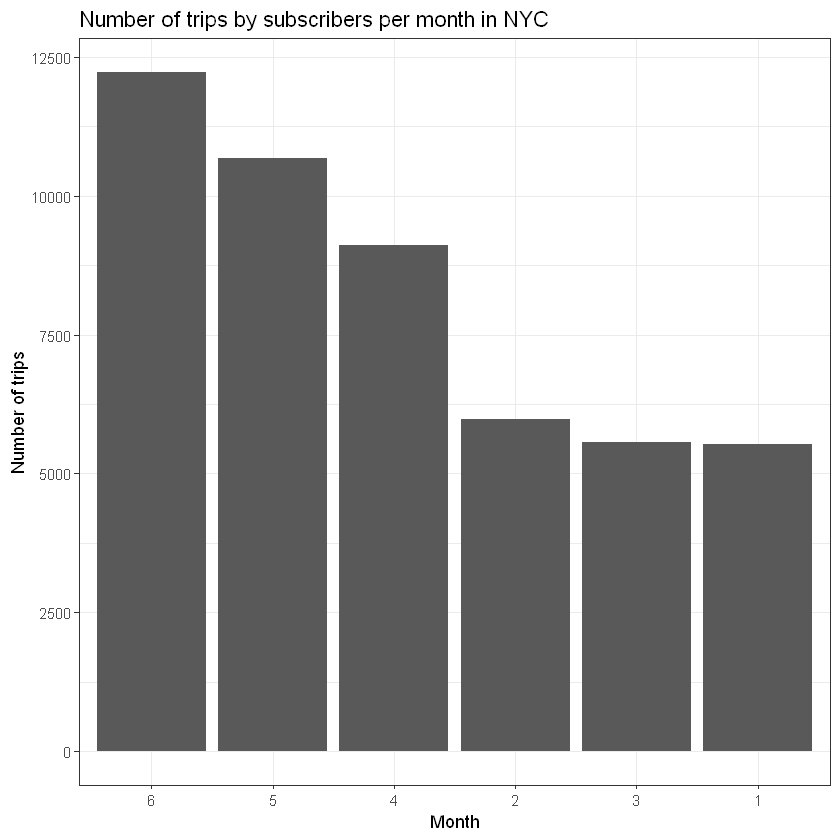

In [93]:
# Bar chart for NYC trips per month
bikeshare %>%
  filter(city == 'NYC' & user_type == 'Subscriber') %>%
  group_by(start_month) %>%
  count %>%
  ggplot(aes(reorder(start_month, -n), n)) +
  geom_bar(stat = 'identity') +
  theme_bw() +
  labs(title = "Number of trips by subscribers per month in NYC ", 
       x = 'Month',
       y = 'Number of trips')

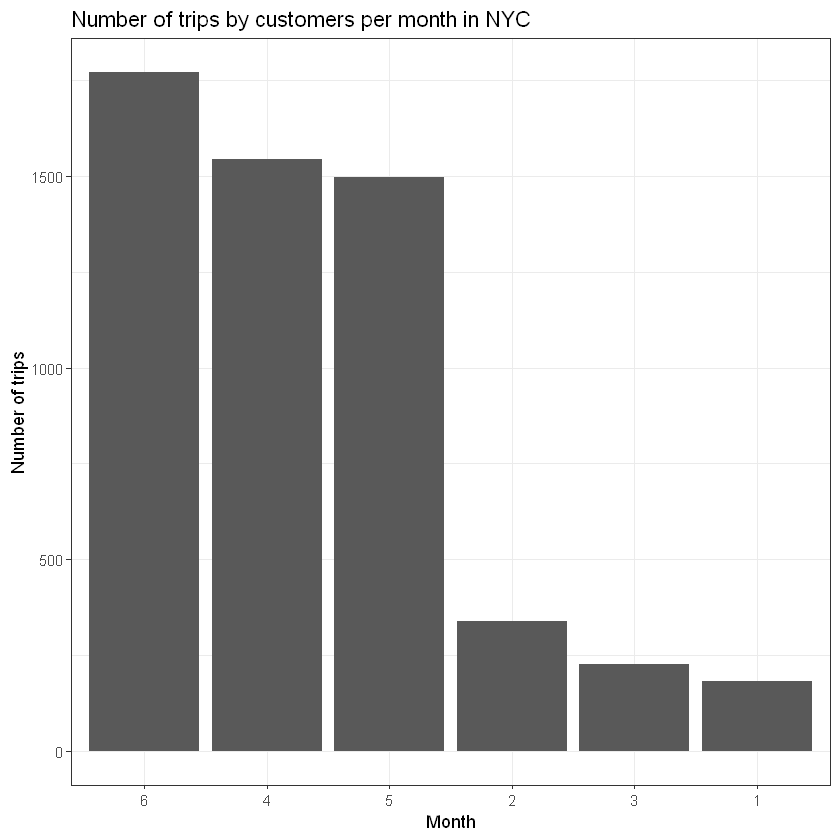

In [94]:
# Bar chart for NYC trips per month
bikeshare %>%
  filter(city == 'NYC' & user_type == 'Customer') %>%
  group_by(start_month) %>%
  count %>%
  ggplot(aes(reorder(start_month, -n), n)) +
  geom_bar(stat = 'identity') +
  theme_bw() +
  labs(title = "Number of trips by customers per month in NYC ", 
       x = 'Month',
       y = 'Number of trips')

Subscribers in NYC take more trips as the months progress which probably means as the weather gets warmer subscribers take more trips than just normal day to day trips. One interesting observation though that subscribers take more trips in February than in March. 

Customers in NYC take far fewer trips than subscribers on average. However, one interesting observation is that customers take more trips in April than they do in May. Another observation is that customers also take more trips in February than they do in March.

In [95]:
bikeshare %>%
  filter(city == 'CHI' & user_type == 'Subscriber') %>%
  group_by(start_month) %>%
  count %>%
  summary

  start_month         n         
 Min.   :1.00   Min.   : 622.0  
 1st Qu.:2.25   1st Qu.: 761.5  
 Median :3.50   Median : 987.0  
 Mean   :3.50   Mean   :1147.2  
 3rd Qu.:4.75   3rd Qu.:1385.0  
 Max.   :6.00   Max.   :2083.0  

In [96]:
bikeshare %>%
  filter(city == 'CHI' & user_type == 'Customer') %>%
  group_by(start_month) %>%
  count %>%
  summary

  start_month         n         
 Min.   :1.00   Min.   : 28.00  
 1st Qu.:2.25   1st Qu.: 73.25  
 Median :3.50   Median :241.00  
 Mean   :3.50   Mean   :291.00  
 3rd Qu.:4.75   3rd Qu.:425.25  
 Max.   :6.00   Max.   :732.00  

Subscribers in CHI take an average of 1,147 trips compared to customers taking an average of 291 trips each month. Next I will visualize total trips taken each month by user type.

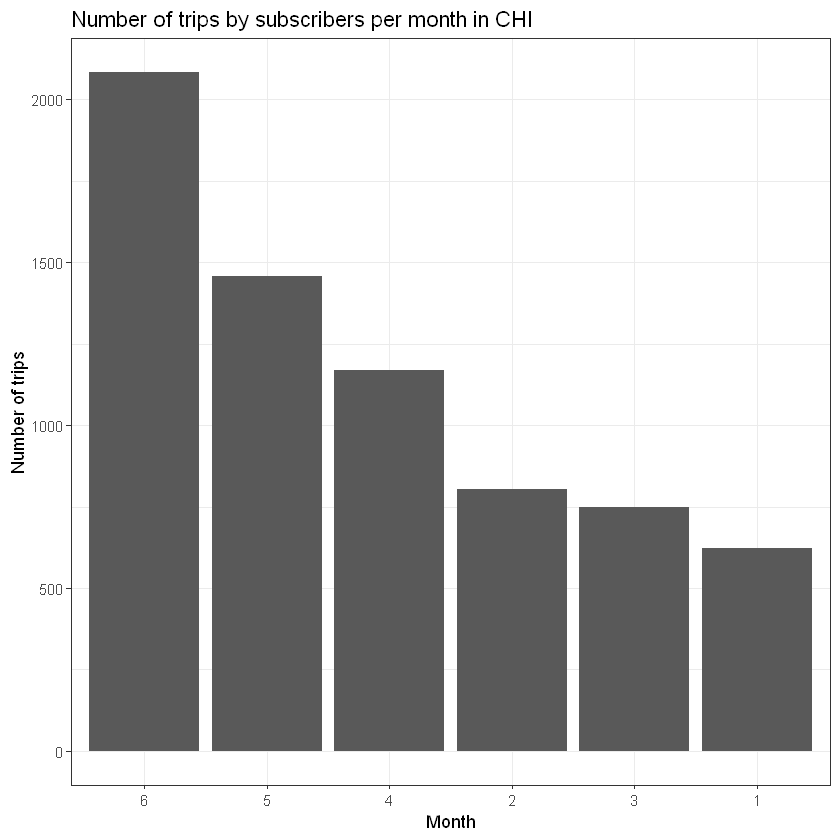

In [97]:
# Bar chart for CHI trips per month for subscribers
bikeshare %>%
  filter(city == 'CHI' & user_type == 'Subscriber') %>%
  group_by(start_month) %>%
  count %>%
  ggplot(aes(reorder(start_month, -n), n)) +
  geom_bar(stat = 'identity') +
  theme_bw() +
  labs(title = "Number of trips by subscribers per month in CHI", 
       x = 'Month',
       y = 'Number of trips')

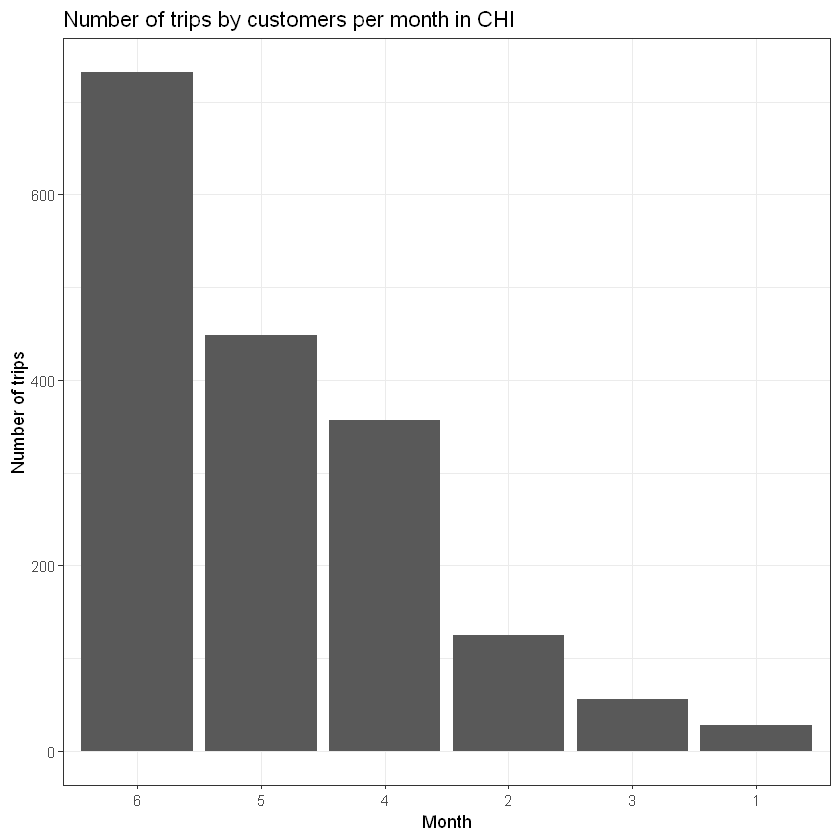

In [98]:
# Bar chart for CHI trips per month for customers
bikeshare %>%
  filter(city == 'CHI' & user_type == 'Customer') %>%
  group_by(start_month) %>%
  count %>%
  ggplot(aes(reorder(start_month, -n), n)) +
  geom_bar(stat = 'identity') +
  theme_bw() +
  labs(title = "Number of trips by customers per month in CHI", 
       x = 'Month',
       y = 'Number of trips')

Subscribers in CHI take more trips as the months progress which probably means as the weather gets warmer, subscribers take more trips than just normal day to day trips. One interesting observation is that subscribers take more trips in February than in March which was also the same observation for NYC users.

Customers in CHI take far fewer trips than subscribers on average. However, customers also take more trips in February than they do in March.

In [99]:
bikeshare %>%
  filter(city == 'WASH' & user_type == 'Subscriber') %>%
  group_by(start_month) %>%
  count %>%
  summary

  start_month         n        
 Min.   :1.00   Min.   : 7810  
 1st Qu.:2.25   1st Qu.: 9465  
 Median :3.50   Median :11030  
 Mean   :3.50   Mean   :10933  
 3rd Qu.:4.75   3rd Qu.:12200  
 Max.   :6.00   Max.   :14196  

In [100]:
bikeshare %>%
  filter(city == 'WASH' & user_type == 'Customer') %>%
  group_by(start_month) %>%
  count %>%
  summary

  start_month         n       
 Min.   :1.00   Min.   :1136  
 1st Qu.:2.25   1st Qu.:2360  
 Median :3.50   Median :3812  
 Mean   :3.50   Mean   :3908  
 3rd Qu.:4.75   3rd Qu.:5836  
 Max.   :6.00   Max.   :6304  

Subscribers in WASH take an average of 10,933 trips compared to customers taking an average of 3,908 trips each month. Next I will visualize total trips taken each month by user type.

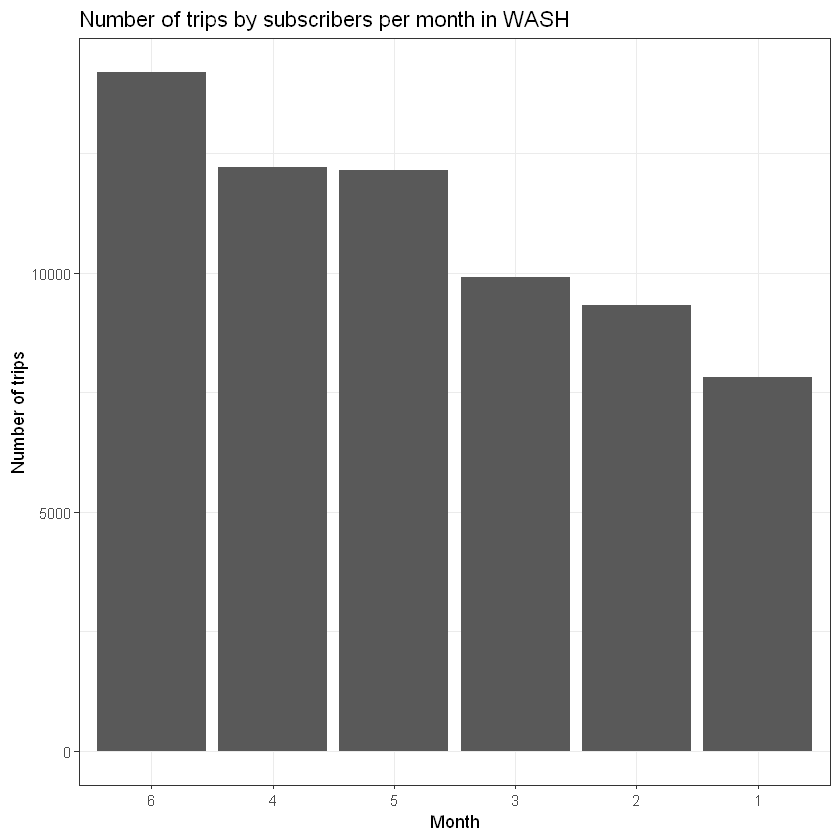

In [101]:
# Bar chart for WASH trips per month for subscribers
bikeshare %>%
  filter(city == 'WASH' & user_type == 'Subscriber') %>%
  group_by(start_month) %>%
  count %>%
  ggplot(aes(reorder(start_month, -n), n)) +
  geom_bar(stat = 'identity') +
  theme_bw() +
  labs(title = "Number of trips by subscribers per month in WASH", 
       x = 'Month',
       y = 'Number of trips')

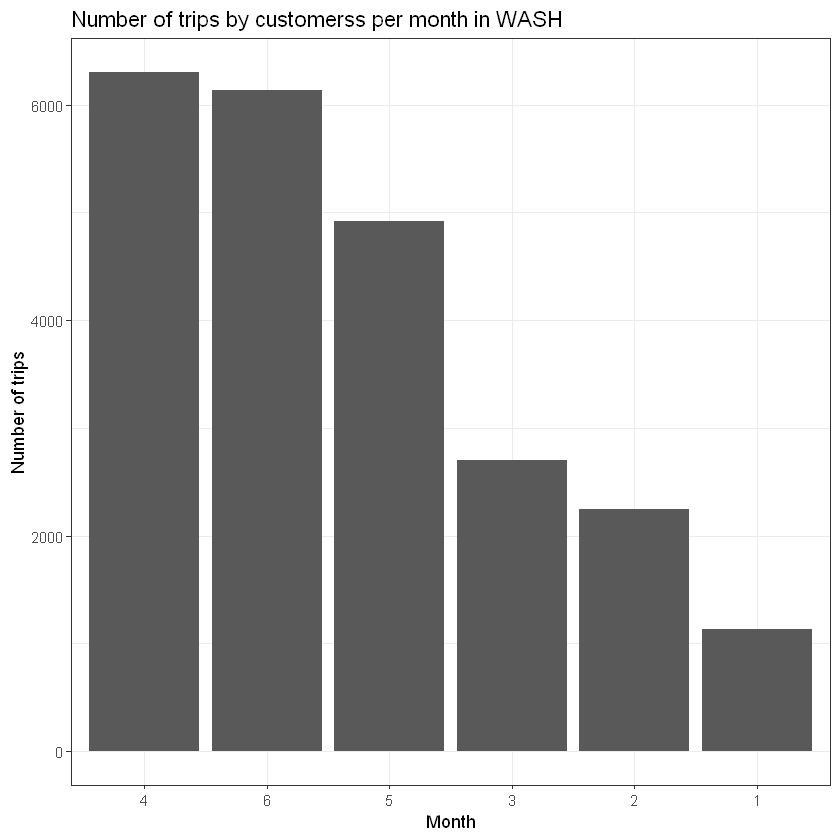

In [102]:
# Bar chart for WASH trips per month for customers
bikeshare %>%
  filter(city == 'WASH' & user_type == 'Customer') %>%
  group_by(start_month) %>%
  count %>%
  ggplot(aes(reorder(start_month, -n), n)) +
  geom_bar(stat = 'identity') +
  theme_bw() +
  labs(title = "Number of trips by customerss per month in WASH", 
       x = 'Month',
       y = 'Number of trips')

Subscribers in WASH take more trips as the months progress which probably means as the weather gets warmer, subscribers take more trips than just normal day to day trips. One interesting observation is that subscribers take more trips in April than in May. However, unlike in CHI and NYC, subscribers take more trips in March than in February.

Customers in WASH take far fewer trips than subscribers on average. However, customers also take more trips in April than any other month. Customers also take more trips in March than in February unlike the other cities.

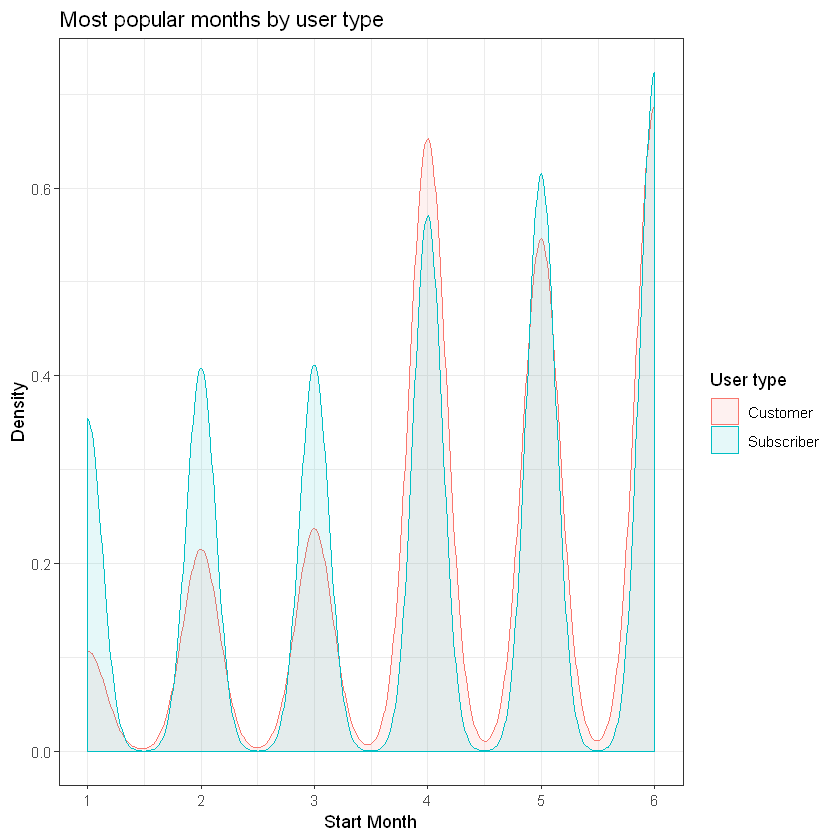

In [103]:
# Density plot
bikeshare %>%
  filter(user_type %in% c("Subscriber", "Customer")) %>%
  ggplot(aes(start_month, color = user_type, fill = user_type)) +
  scale_x_continuous(breaks = scales::pretty_breaks(n=6)) +
  geom_density(alpha = 0.1) +
  theme_bw() +
  labs(title = 'Most popular months by user type', 
       x = 'Start Month',
       y = 'Density',
       color = 'User type',
       fill = 'User type')

The denisty plot does a great job of summarising the observations made regarding trips per month by user type. This density plot shows that the majority of the trips taken are in July and that both subscribers and customers drive that usage. 

An interesting observation is that customers are taking more trips in April than subscribers which as we saw is really driven by the trips taken by customers in WASH.

### What is the most common start station in each city?

#### Most common start station for NYC

In [104]:
bikeshare %>%
  filter(city == 'NYC') %>%
  select(start_station) %>%
  summary 

               start_station  
 Pershing Square North:  592  
 W 21 St & 6 Ave      :  385  
 Broadway & E 22 St   :  383  
 E 17 St & Broadway   :  380  
 West St & Chambers St:  364  
 W 20 St & 11 Ave     :  329  
 (Other)              :52336  

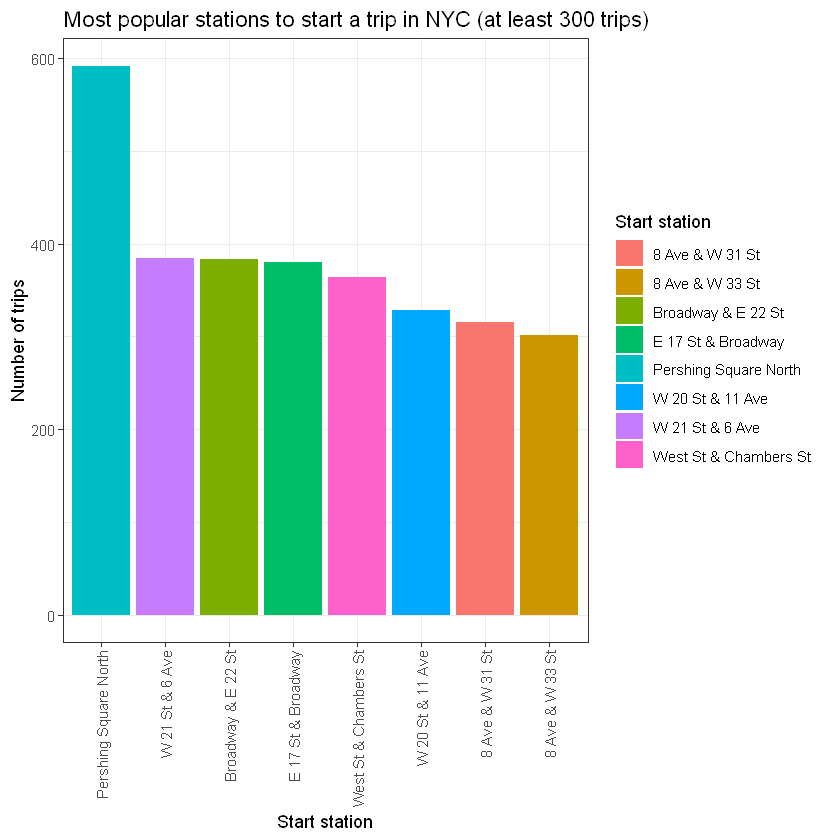

In [105]:
# Bar chart for NYC most popular stations
bikeshare %>%
  filter(city == 'NYC') %>%
  group_by(start_station) %>%
  count %>%
  filter(n >= 300) %>%
  ggplot(aes(reorder(start_station, -n), n, fill = start_station)) +
  geom_bar(stat = 'identity') +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  labs(title = "Most popular stations to start a trip in NYC (at least 300 trips)", 
       x = 'Start station',
       y = 'Number of trips',
       fill = 'Start station')

After filtering the data to focus on bike share data from New York City, it is clear that Pershing Square North is the most common start station.

The bar chart shows that the next three stations are close in the amount of trips that originate from their station. 

These stations represent locations that would need emphasis on ensuring there are enough bikes present for the amount of riders.

#### Most common start station for CHI

In [106]:
bikeshare %>%
  filter(city == 'CHI') %>%
  select(start_station) %>%
  summary

                      start_station 
 Streeter Dr & Grand Ave     : 210  
 Lake Shore Dr & Monroe St   : 140  
 Clinton St & Washington Blvd: 120  
 Clinton St & Madison St     : 102  
 Canal St & Adams St         : 101  
 Michigan Ave & Oak St       :  98  
 (Other)                     :7859  

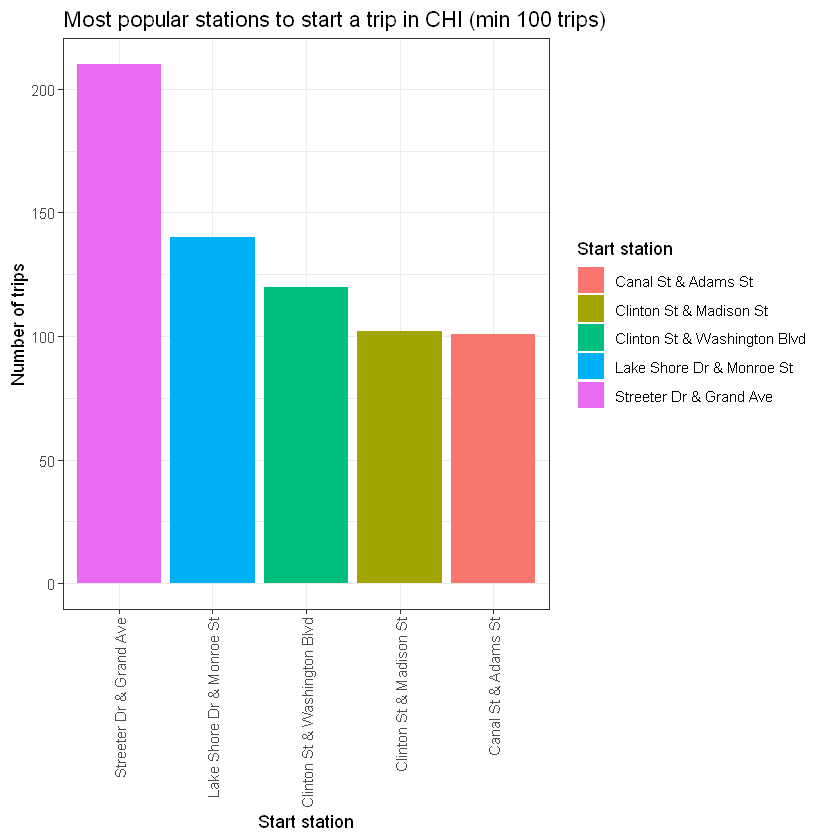

In [107]:
# Bar chart for CHI most popular stations
bikeshare %>%
  filter(city == 'CHI') %>%
  group_by(start_station) %>%
  count %>%
  filter(n >= 100) %>%
  ggplot(aes(reorder(start_station, -n), n, fill = start_station)) +
  geom_bar(stat = 'identity') +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  labs(title = "Most popular stations to start a trip in CHI (min 100 trips)", 
       x = 'Start station',
       y = 'Number of trips',
       fill = 'Start station')

After filtering the data to focus on bike share data from Chicago, it is clear that Streeter Dr & Grand Ave is the most common start station.n.

These stat in the bar chartions represent locations that would need emphasis on ensuring there are enough bikes present for the amount of riders.

#### Most common start station for WASH

In [108]:
bikeshare %>%
  filter(city == 'WASH') %>%
  select(start_station) %>%
  summary

                              start_station  
 Columbus Circle / Union Station     : 1700  
 Lincoln Memorial                    : 1546  
 Jefferson Dr & 14th St SW           : 1488  
 Massachusetts Ave & Dupont Circle NW: 1219  
 Jefferson Memorial                  : 1068  
 15th & P St NW                      : 1040  
 (Other)                             :80989  

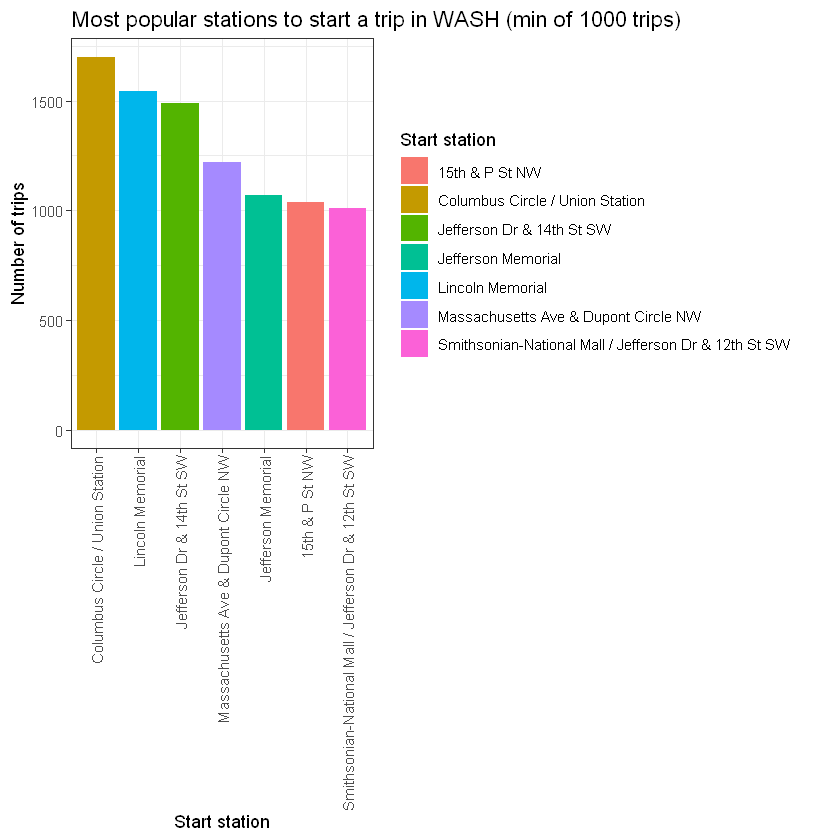

In [109]:
# Bar chart for WASH most popular stations
bikeshare %>%
  filter(city == 'WASH') %>%
  group_by(start_station) %>%
  count %>%
  filter(n >= 1000) %>%
  ggplot(aes(reorder(start_station, -n), n, fill = start_station)) +
  geom_bar(stat = 'identity') +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
  labs(title = "Most popular stations to start a trip in WASH (min of 1000 trips)", 
       x = 'Start station',
       y = 'Number of trips',
       fill = 'Start station')

After filtering the data to focus on bike share data from Washington, DC, it is clear that Columbus Circle / Union Station is the most common start station.

The bar chart shows that the nextwoee stations are close in the amount of trips that originate from their station.

These stations represent locations that would need emphasis on ensuring there are enough bikes present for the amount of riders.

### What are the counts of each user type by city?

In [110]:
# Get total count of customers and subscribers by city
addmargins(table(bikeshare$city, bikeshare$user_type))

,,Customer,Subscriber,Sum
CHI,1,1746,6883,8630
NYC,118,5558,49093,54769
WASH,0,23450,65600,89050
Sum,119,30754,121576,152449


CHI has 1,746 customers and 6,883 subscribers.

NYC has 5,558 customers and 49,093 subscribers.

WASH has 23,450 customers and 65,600 subscribers.

In [111]:
# Get proportion of customers and subscribers in each city
addmargins(round(prop.table(table(bikeshare$city, bikeshare$user_type), 1)*100))

,,Customer,Subscriber,Sum
CHI,0,20,80,100
NYC,0,10,90,100
WASH,0,26,74,100
Sum,0,56,244,300


In CHI subscribers take 80% of all trips taken in CHI. While customers take 20% of the trips taken in CHI.

In NYC subscribers take 90% of the trips in NYC. Customers take 10% of the trips in NYC.

In WASH subscribers take 74% of the trips taken in WASH. Customers take 26% of the trips in WASH.

In [112]:
# Get proportion of customers and subscribers 
addmargins(round(prop.table(table(bikeshare$city, bikeshare$user_type), 2)*100))

,,Customer,Subscriber,Sum
CHI,1,6,6,13
NYC,99,18,40,157
WASH,0,76,54,130
Sum,100,100,100,300


76% of all customers are in WASH, 18% of customers are in NYC, and 6% of customers are in CHI.

54% of all subscribers are in WASH, 40% of customers are in NYC, and 6% of customers are in CHI.

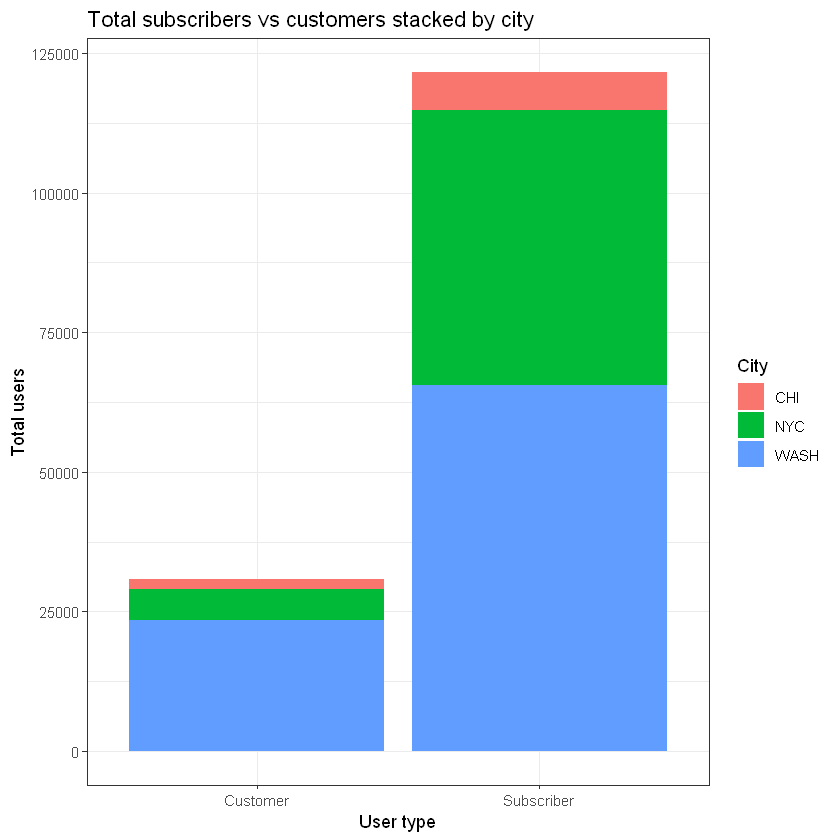

In [113]:
# Stacked Bar plots
bikeshare %>%
  filter(user_type %in% c("Subscriber", "Customer")) %>%
  ggplot(aes(user_type, fill = city)) +
  geom_bar() +
  theme_bw() +
  labs(title = 'Total subscribers vs customers stacked by city',
       x = 'User type',
       y = 'Total users',
       fill = 'City')

The stacked bar chart shows a visual representation of the descriptive statisticall analysis completed above. This visual shows that WASH is the most common city for both customers and subscribers which means that city is having the most usage of bike share trips.

<a id='conclusions'></a>
## Conclusions

Washington, DC has the most ultilization of bike share than other other city in this dataset. There are multiple starting stations that account for over 1,000 trips each in Washington, DC and it will be important to ensure these stations continue to have the proper amount of bikes to account for the demand. 

The proportion of subscribers in NYC is 90%, the most compared to any other city. This probably means more local residents use the service than any other city. There could some opportunity to increase the amount of customers that use the bike share service through marketing or other means.

Chicago has the least amount of usage of their bike share services. This could be because the program is new to Chicago or for other reasons and would require additional analysis outside of this report. One interesting observation is that the usage per month does follow the same pattern as NYC where both subscribers and customers use the service more in February than in March.